In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../data/digital.csv")

In [4]:
data

,Time [s],Device 2,Device 1,Data,Clock
0,-6.738306,0,1,1,1
1,-6.738305,0,1,1,0
2,-6.738305,0,1,1,1
3,-6.738305,0,1,1,0
4,-6.738305,0,1,1,1
...,...,...,...,...,...
17376357,0.045174,1,0,0,0
17376358,0.045174,1,0,0,1
17376359,0.045174,1,0,0,0
17376360,0.045175,1,0,0,1


In [5]:
num_bytes_in_command = 3
device_1_data = data[(data["Device 1"] == 0) & (data["Clock"] != data["Clock"].shift()) & (data["Clock"] == 1)][["Time [s]", "Data"]]

In [6]:
device_1_bytes = pd.DataFrame([[data["Time [s]"][i], int("".join([str(bit) for bit in device_1_data["Data"][i:i+8]]), 2)] for i in range(0, len(device_1_data["Data"]), 8)])
device_1_commands = [[device_1_bytes.iloc[:,0][n], device_1_bytes.iloc[:,1][n:n+num_bytes_in_command]] for n in range(0, len(device_1_bytes), num_bytes_in_command)]

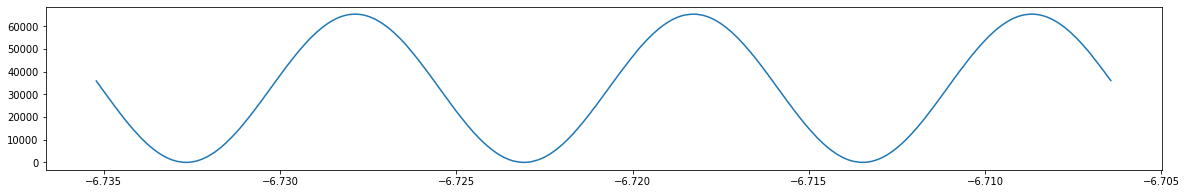

In [7]:
num_periods = 3
samples = num_periods * 1024
offset = 330
plt.figure(figsize=(20,3))
plt.plot([device_1_commands[n+offset][0] for n in range(samples)], [device_1_commands[n+offset][1].iloc[1] * 255 + device_1_commands[n+offset][1].iloc[2] for n in range(samples)])

In [8]:
device_2_data = data[(data["Device 2"] == 0) & (
    data["Clock"] != data["Clock"].shift()) & (data["Clock"] == 1)]["Data"][9:]
device_2_bytes = [hex(val) for val in [int("".join(
    map(str, device_2_data[i:i+8])), 2) for i in range(0, len(device_2_data), 8)]]
device_2_commands = [device_2_bytes[n:n+3]
                     for n in range(0, len(device_2_bytes), 3)]
pd.DataFrame(device_2_commands)

,0,1,2
0,0x8,0xf,0xff
1,0x8,0xf,0xff
2,0x8,0xf,0xff
3,0x8,0xf,0xff
4,0x8,0xf,0xff
...,...,...,...
9822,0x8,0xf,0xff
9823,0x8,0xf,0xff
9824,0x8,0xf,0xff
9825,0x8,0xf,0xff
